In [1]:
# My First Kaggle 
import os
import numpy as np
import pandas as pd

filepath = "data/train.csv"
input_data = pd.read_csv(filepath)

input_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
df_cols  = ['Survived', 'Pclass','Sex', 'Age', 'SibSp', 'Parch', 'Embarked']

df = input_data[df_cols].copy()
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S


In [3]:
gender = {'male': 1, 'female': 0} 
df.Sex = df.Sex.map(gender).astype(int)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,1,22.0,1,0,S
1,1,1,0,38.0,1,0,C
2,1,3,0,26.0,0,0,S
3,1,1,0,35.0,1,0,S
4,0,3,1,35.0,0,0,S


In [4]:
# Find columns that have null value
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Embarked      2
dtype: int64

In [5]:
# Fill with age mean values 
age_mean = df['Age'].mean()
df['Age'] = df['Age'].fillna(age_mean)

df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Embarked    2
dtype: int64

In [6]:
df[df.Embarked.isnull()]

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
61,1,1,0,38.0,0,0,NaN
829,1,1,0,62.0,0,0,NaN


In [7]:
# 將 Embarked 欄位的 null 以前一個值填滿
df.Embarked.fillna(method = 'ffill', inplace = True)
df[df.Embarked.isnull()]

# Show specific rows
# print(df.loc[[61, 829]])

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked


In [8]:
x_OneHot_df = pd.get_dummies(data=df, columns=['Embarked'])
x_OneHot_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,0,0,1
1,1,1,0,38.0,1,0,1,0,0
2,1,3,0,26.0,0,0,0,0,1
3,1,1,0,35.0,1,0,0,0,1
4,0,3,1,35.0,0,0,0,0,1


In [9]:
# Convert dataframe to array
ndarray = x_OneHot_df.values
ndarray.shape

(891, 9)

In [10]:
ndarray[:5]

array([[ 0.,  3.,  1., 22.,  1.,  0.,  0.,  0.,  1.],
       [ 1.,  1.,  0., 38.,  1.,  0.,  1.,  0.,  0.],
       [ 1.,  3.,  0., 26.,  0.,  0.,  0.,  0.,  1.],
       [ 1.,  1.,  0., 35.,  1.,  0.,  0.,  0.,  1.],
       [ 0.,  3.,  1., 35.,  0.,  0.,  0.,  0.,  1.]])

In [11]:
Labels = ndarray[:, 0]
Labels[:5]

array([0., 1., 1., 1., 0.])

In [12]:
Features = ndarray[:, 1:]
Features[:5]

array([[ 3.,  1., 22.,  1.,  0.,  0.,  0.,  1.],
       [ 1.,  0., 38.,  1.,  0.,  1.,  0.,  0.],
       [ 3.,  0., 26.,  0.,  0.,  0.,  0.,  1.],
       [ 1.,  0., 35.,  1.,  0.,  0.,  0.,  1.],
       [ 3.,  1., 35.,  0.,  0.,  0.,  0.,  1.]])

In [13]:
# Normalize Age values

from sklearn import preprocessing

minmax_scale = preprocessing.MinMaxScaler(feature_range = (0,1))
scaledFeatures = minmax_scale.fit_transform(Features)

scaledFeatures[:5]

array([[1.        , 1.        , 0.27117366, 0.125     , 0.        ,
        0.        , 0.        , 1.        ],
       [0.        , 0.        , 0.4722292 , 0.125     , 0.        ,
        1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.32143755, 0.        , 0.        ,
        0.        , 0.        , 1.        ],
       [0.        , 0.        , 0.43453129, 0.125     , 0.        ,
        0.        , 0.        , 1.        ],
       [1.        , 1.        , 0.43453129, 0.        , 0.        ,
        0.        , 0.        , 1.        ]])

In [14]:
df2 = input_data[df_cols].copy()

msk = np.random.rand(len(df2)) < 0.8
train_df = df2[msk]
test_df  = df2[~msk]
print('total', len(df2), 'train:', len(train_df), 'test:', len(test_df))

total 891 train: 702 test: 189


In [15]:
train_df[:5]

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
4,0,3,male,35.0,0,0,S
5,0,3,male,NaN,0,0,Q


In [16]:
test_df[:5]

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
3,1,1,female,35.0,1,0,S
9,1,2,female,14.0,1,0,C
10,1,3,female,4.0,1,1,S
13,0,3,male,39.0,1,5,S
19,1,3,female,NaN,0,0,C


In [19]:
def PreprocessData(raw_df):
    
    age_mean  = raw_df['Age'].mean()
    raw_df.loc[raw_df.Age.isnull(), "Age"] = age_mean
    
    raw_df.loc[raw_df.Sex == 'male',   "Sex"] = 1
    raw_df.loc[raw_df.Sex == 'female', "Sex"] = 0
    
    x_OneHot_df = pd.get_dummies(data = raw_df, columns=["Embarked"])

    ndarray = x_OneHot_df.values
    Labels   = ndarray[:, 0]
    Features = ndarray[:, 1:]
    
    minmax_scale = preprocessing.MinMaxScaler(feature_range = (0,1))
    scaledFeatures = minmax_scale.fit_transform(Features)
    
    return scaledFeatures, Labels

In [20]:
train_Features, train_Labels = PreprocessData(train_df)
test_Features,  test_Labels  = PreprocessData(test_df)

C:\Anaconda3\envs\tf_gpu\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
C:\Anaconda3\envs\tf_gpu\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [21]:
train_Features[:5]

array([[1.        , 1.        , 0.27117366, 0.125     , 0.        ,
        0.        , 0.        , 1.        ],
       [0.        , 0.        , 0.4722292 , 0.125     , 0.        ,
        1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.32143755, 0.        , 0.        ,
        0.        , 0.        , 1.        ],
       [1.        , 1.        , 0.43453129, 0.        , 0.        ,
        0.        , 0.        , 1.        ],
       [1.        , 1.        , 0.3651025 , 0.        , 0.        ,
        0.        , 1.        , 0.        ]])

In [22]:
train_Labels[:5]

array([0., 1., 1., 0., 0.])

In [23]:
# Create Model

from keras.models import Sequential
from keras.layers import Dense, Dropout

# Cretae keras Sequential Model
model = Sequential()

# Create Input & Hidden Layer 1
model.add(Dense(units = 40, 
                input_dim = 8,
                kernel_initializer = 'uniform',
                activation = 'relu'))

# Create Hidden Layer 2
model.add(Dense(units = 30,
               kernel_initializer = 'uniform',
               activation = 'relu'))

# Create Output Layer
model.add(Dense(units = 1,
               kernel_initializer = 'uniform',
               activation = 'sigmoid'))

print(model.summary())

Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 40)                360       
_________________________________________________________________
dense_2 (Dense)              (None, 30)                1230      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 31        
Total params: 1,621
Trainable params: 1,621
Non-trainable params: 0
_________________________________________________________________
None


In [24]:
# Training

# Define Training method
model.compile(loss='binary_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

# Begin Training
train_history = model.fit(x = train_Features,
                          y = train_Labels,
                          validation_split = 0.1,
                          epochs = 30,
                          batch_size = 30,
                          verbose = 2)

Train on 631 samples, validate on 71 samples
Epoch 1/30
 - 2s - loss: 0.6913 - acc: 0.6101 - val_loss: 0.6857 - val_acc: 0.6338
Epoch 2/30
 - 0s - loss: 0.6810 - acc: 0.6101 - val_loss: 0.6600 - val_acc: 0.6338
Epoch 3/30
 - 0s - loss: 0.6521 - acc: 0.6101 - val_loss: 0.6142 - val_acc: 0.6338
Epoch 4/30
 - 0s - loss: 0.6200 - acc: 0.6101 - val_loss: 0.5697 - val_acc: 0.6338
Epoch 5/30
 - 0s - loss: 0.5908 - acc: 0.6371 - val_loss: 0.5288 - val_acc: 0.7042
Epoch 6/30
 - 0s - loss: 0.5596 - acc: 0.6973 - val_loss: 0.4940 - val_acc: 0.8169
Epoch 7/30
 - 0s - loss: 0.5312 - acc: 0.7670 - val_loss: 0.4700 - val_acc: 0.8310
Epoch 8/30
 - 0s - loss: 0.5230 - acc: 0.7734 - val_loss: 0.4663 - val_acc: 0.8169
Epoch 9/30
 - 0s - loss: 0.5099 - acc: 0.7940 - val_loss: 0.4516 - val_acc: 0.8310
Epoch 10/30
 - 0s - loss: 0.4954 - acc: 0.7813 - val_loss: 0.4387 - val_acc: 0.8169
Epoch 11/30
 - 0s - loss: 0.4848 - acc: 0.7813 - val_loss: 0.4323 - val_acc: 0.8169
Epoch 12/30
 - 0s - loss: 0.4777 - acc: 

In [25]:
import matplotlib.pyplot as plt

def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel('train')
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

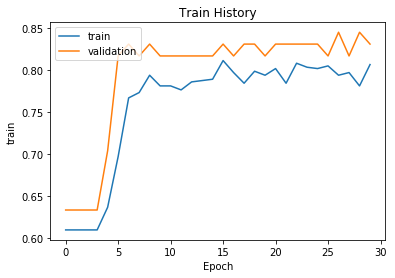

In [26]:
show_train_history(train_history, 'acc', 'val_acc')

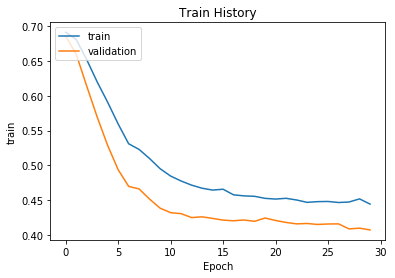

In [27]:
show_train_history(train_history, 'loss', 'val_loss')

In [28]:
# Accuracy Evaluation

scores = model.evaluate(x = test_Features, y = test_Labels)
scores[1]

189/189 [==============================] - 0s 148us/step


0.8201058242056105